In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from zipfile import ZipFile
import zipfile
import cv2
import os
import numpy as np
from PIL import Image

In [2]:
%matplotlib inline

import numpy as np
from pprint import pprint

from PIL import Image
import matplotlib.pyplot as plt

import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import grad
import torchvision.transforms.functional as F
import torchvision
from torchvision import models, datasets, transforms
import torch.nn.functional as func
#torch.manual_seed(50)


print(torch.__version__, torchvision.__version__)

#print (torch.cuda.get_device_name(device='cuda:0'))

2.0.0+cu118 0.15.1+cu118


In [3]:
data_dir = 'Covid_chest_X-raydata\Covid_chest_X-raydata\Covid19-dataset'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'val']
['Covid', 'Normal', 'Viral Pneumonia']


In [4]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

Checking **mean** and **SD**

In [5]:
# import torchvision
# from torchvision import transforms
# from torch.utils.data import DataLoader

# data_path = 'skin1\melanoma_cancer_dataset'

# transform_img = transforms.Compose([
#     #transforms.Resize((32,32)),
#     #transforms.CenterCrop(32),
#     transforms.ToTensor(),
# ])

# image_data = torchvision.datasets.ImageFolder(
#   root=data_path, transform=transform_img
# )

# image_data_loader = DataLoader(
#   image_data, 
#   batch_size=len(image_data), 
#   shuffle=False, 
#   num_workers=0
# )
# from torch.utils.data import DataLoader


# def mean_std(loader):
#   images, lebels = next(iter(loader))
#   # shape of images = [b,c,w,h]
#   mean, std = images.mean([0,2,3]), images.std([0,2,3])
#   return mean, std

# mean, std = mean_std(image_data_loader)
# print("mean and std: \n", mean, std)

In [6]:
from sklearn.utils import shuffle
import torchvision.transforms as transforms

tp = transforms.Compose([
    #transforms.Resize(32),
    #transforms.CenterCrop(32),
    transforms.Resize((32,32)),
    
    transforms.ToTensor()
    #transforms.Normalize((0.7160, 0.5668, 0.5441), (0.2207, 0.2087, 0.2222)),
    #transforms.Grayscale(num_output_channels=1)
])
tt = transforms.ToPILImage()

dataset = ImageFolder(data_dir+'/train', transform=tp)
#dataset1 = DataLoader(trainset, shuffle=True, batch_size=batch_size, num_workers=0)



In [7]:
type(dataset)

torchvision.datasets.folder.ImageFolder

In [8]:
img, label = dataset[0]
print(img.shape, label)

torch.Size([3, 32, 32]) 0


In [9]:
type(img)

torch.Tensor

In [10]:
img_na = img.numpy()
print(type(img))
print(type(img_na))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


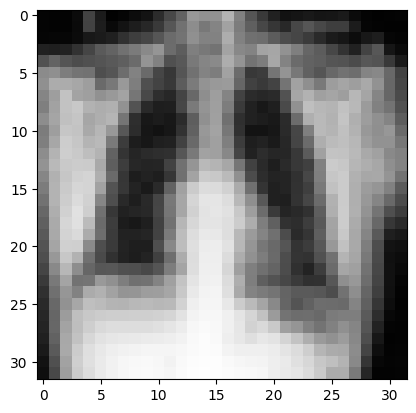

In [11]:
plt.imshow(img.permute(1, 2, 0)) 


In [12]:
#from PIL import Image
#img_data=[]
#images=os.listdir('/content/sample_data/Covid')
#for img in images:
#  image_arr= cv2.imread(os.path.join('/content/sample_data/Covid',img))
#  
#  img_data.append(image_arr)

In [13]:
dataset

Dataset ImageFolder
    Number of datapoints: 251
    Root location: Covid_chest_X-raydata\Covid_chest_X-raydata\Covid19-dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [14]:
image_data=[]
target=[]
for i, j in dataset:
  image_data.append(i)
  target.append(j)

In [15]:
image_data1=torch.stack(image_data)
image_data2=image_data1.numpy()
image_data2.shape

(251, 3, 32, 32)

In [16]:
qq=np.rollaxis(image_data2,1,4)
qq.shape

(251, 32, 32, 3)

In [17]:
#plt.imshow(qq[555])

In [18]:
# dst = datasets.CIFAR100("~/.torch", download=True)
# dst = datasets.MNIST("~/.torch", download=True)

# tp = transforms.Compose([
#     #transforms.Resize(32),
#     #transforms.CenterCrop(32),
#     transforms.Resize((32,32)),
#     transforms.ToTensor(), transforms.Grayscale(num_output_channels=1)
# ])
# tt = transforms.ToPILImage()

device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
print("Running on %s" % device)

def label_to_onehot(target, num_classes=3):
    target = torch.unsqueeze(target, 1)
    onehot_target = torch.zeros(target.size(0), num_classes, device=target.device)
    onehot_target.scatter_(1, target, 1)
    return onehot_target

def cross_entropy_for_onehot(pred, target):
    return torch.mean(torch.sum(- target * F.log_softmax(pred, dim=-1), 1))

Running on cuda


In [19]:
# def weights_init(m):
#     if hasattr(m, "weight"):
#         m.weight.data.uniform_(-0.5, 0.5)
#         nn.init.xavier_uniform_(m.weight.data)
#     if hasattr(m, "bias"):
#         #m.bias.data.uniform_(-0.5, 0.5)
#         #nn.init.xavier_uniform(m.bias.data)
#         m.bias.data.fill_(0)



# class LeNet(nn.Module):

#     def __init__(self):

#         super(LeNet, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, kernel_size=5,stride=2)
#         self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=2)
#         self.fc1 = nn.Linear(16*5*5, 256)
#         self.fc2 = nn.Linear(256, 120)
#         self.fc3 = nn.Linear(120, 106)

#     def forward(self, x):
#         #x = func.relu(self.conv1(x))
#         x = func.sigmoid(self.conv1(x))
#         #x = func.max_pool2d(x, 2)
#         #x = func.relu(self.conv2(x))
#         x = func.sigmoid(self.conv2(x))
#         #x = func.max_pool2d(x, 2)
#         x = x.view(x.size(0), -1)
#         #x = func.relu(self.fc1(x))
#         x = func.sigmoid(self.fc1(x))
#         #x = func.relu(self.fc2(x))
#         x = func.sigmoid(self.fc2(x))
#         x = self.fc3(x)
#         return x

    
    
# def weights_init(m):
#     if hasattr(m, "weight"):
#         m.weight.data.uniform_(-0.3, 0.3)
#     if hasattr(m, "bias"):
#         m.bias.data.uniform_(-0.3, 0.3)

torch.manual_seed(50)

def weights_init(m):
    if hasattr(m, "weight"):
        m.weight.data.uniform_(-0.5, 0.5)
    if hasattr(m, "bias"):
        m.bias.data.uniform_(-0.5, 0.5)
        
def weights_init_dropout(m):
    if hasattr(m, "weight"):
        m.weight.data.uniform_(-0.1, 0.1)
    if hasattr(m, "bias"):
        m.bias.data.uniform_(-0.1, 0.1)

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        act = nn.Sigmoid
        #act = nn.Tanh
        #act = nn.ReLU
        #act = nn.Softmax
        self.body = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
            nn.Conv2d(16, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
            nn.Conv2d(16, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
            nn.Conv2d(16, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
            nn.Conv2d(16, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
            nn.Conv2d(16, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
           
        )
        self.fc = nn.Sequential(
                nn.Linear(40000, 3)
                # nn.Dropout(p=0.0)
        )
        
    def forward(self, x):
        out = self.body(x)
        out = out.view(out.size(0), -1)
        # print(out.size())
        out = self.fc(out)
        return out

    

net = LeNet().to(device)
net.apply(weights_init)


# class LeNet_att(nn.Module):
#     def __init__(self):
#         super(LeNet_att, self).__init__()
#         act = nn.Sigmoid
#         #act = nn.Tanh
#         #act = nn.ReLU
#         self.body = nn.Sequential(
#             nn.Conv2d(3, 12, kernel_size=5, padding=5//2, stride=2),
#             act(),
#             nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=2),
#             act(),
#             nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=1),
#             act(),
#             nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=1),
#             act(),
#         )
#         self.fc = nn.Sequential(
#                 nn.Linear(768, 106)
#         )
        
#     def forward(self, x):
#         out = self.body(x)
#         out = out.view(out.size(0), -1)
#         # print(out.size())
#         out = self.fc(out)
#         return out

# net_att = LeNet_att().to(device)
# net_att.apply(weights_init_dropout)
    
#criterion = cross_entropy_for_onehot
criterion = nn.CrossEntropyLoss()
print(net)
# for name, param in net.named_parameters():
#     print(name, param.size(), param.requires_grad)

LeNet(
  (body): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid()
    (2): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (3): Sigmoid()
    (4): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (5): Sigmoid()
    (6): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (7): Sigmoid()
    (8): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (9): Sigmoid()
    (10): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (11): Sigmoid()
  )
  (fc): Sequential(
    (0): Linear(in_features=40000, out_features=3, bias=True)
  )
)


In [20]:
import torchvision.transforms as transforms
import torch.optim as optim
from torch.autograd import Variable
from torch.utils import data

#from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
#lfw_people=fetch_lfw_people(min_faces_per_person=10,color=True,slice_=(slice(61,189),slice(61,189)),resize=0.25)

#x=lfw_people.images
#y=lfw_people.target
x=qq
y=target

#target_names=lfw_people.target_names
#n_classes=target_names.shape[0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.00001,shuffle=False)


# #two people
# X_train_two = []
# y_train_two = []
# X_test_two = []
# y_test_two = []
# for ct_d in range(X_train.shape[0]):
#     if  y_train[ct_d] == 6:
#         X_train_two.append(X_train[ct_d])
#         y_train_two.append(0)
#     if  y_train[ct_d] == 9:
#         X_train_two.append(X_train[ct_d])
#         y_train_two.append(1)
        
# for ct_d in range(X_test.shape[0]):
#     if  y_train[ct_d] == 6:        
#         X_test_two.append(X_test[ct_d])
#         y_test_two.append(0)
#     if  y_train[ct_d] == 9:
#         X_test_two.append(X_test[ct_d])
#         y_test_two.append(1)
        
# X_train = np.asarray(X_train_two)    
# X_test = np.asarray(X_test_two)  
# y_train = np.asarray(y_train_two)  
# y_test = np.asarray(y_test_two)  

print (X_train.shape)
print (X_test.shape)

         
#X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
#X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
#X_train = torch.transpose
#X_train = X_train.astype('float32')
#X_train /= 255.0
#X_test /= 255.0

 


x_train = torch.Tensor(X_train).to(device)
x_train = x_train.transpose(2,3).transpose(1,2)
y_train = torch.LongTensor(y_train).to(device)

x_test = torch.FloatTensor(X_test).to(device)
x_test = x_test.transpose(2,3).transpose(1,2)
y_test = torch.LongTensor(y_test).to(device)


training = data.TensorDataset(x_train,y_train)

testing = data.TensorDataset(x_test,y_test)

dst_tensor=training

criterion_train = nn.CrossEntropyLoss()
optimizer_train = optim.Adam(net.parameters(),lr=0.01)#,momentum=0.9)
trainloader = torch.utils.data.DataLoader(training,batch_size=32, shuffle=False)

(250, 32, 32, 3)
(1, 32, 32, 3)


In [21]:
iter_ = 0


for epoch in range(1):

    for i,data in enumerate(trainloader):
   
        #if epoch>=1:
        if i==1:
            #break
            iter_=iter_+1
            #print (iter_)
            inputs,label = data
            #print(input.size())    #printed previously for me.

            inputs,label =  Variable(inputs),Variable(label) 

            optimizer_train.zero_grad()


            outputs_benign=net(inputs)
            
            #outputs_benign = F.softmax(outputs_benign, dim=-1)
            #print (outputs_benign[0])


            loss_benign =  criterion_train(outputs_benign,label)

            #print("loss computed")
            loss_benign.backward()
            #print("loss BP")
            optimizer_train.step()

            #if i%2000==0:
            print (loss_benign.item())
            #torch.save(net.state_dict(),'./LFW_net.pth')  
       
  
print ('fininshed training')
total = len(y_test)
acc =0.0
for ct in range(total):
    testing_data = tt(testing[ct][0].cpu())
    testing_data1 = tp(testing_data).to(device)
    testing_data2 = testing_data1.view(1, *testing_data1.size())
    #print(testing_data2.size())
    y_pred = net(testing_data2)
    predicted = torch.argmax(y_pred)
    #print(predicted, y_test[ct])
    if predicted == y_test[ct]:
        acc=acc+1
        #print(acc)
accuracy = acc / total
print (accuracy)
print ('fininshed testing')

37.248931884765625
fininshed training
0.0
fininshed testing


In [25]:
pip install pytorch-msssim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


In [26]:
import torch.nn.functional as F

In [27]:
# dst_tensor_new=training+testing
# len(dst_tensor_new)
len(dst_tensor)

250

Image ID and Image count:  0 1
torch.Size([1, 3, 32, 32])
torch.Size([1, 1])
tensor([[0]], device='cuda:0')
torch.Size([1, 3])
Dummy label is 1.
stolen label is 0.
Running time is 2.8750.
Duration =  0.2875
ssim_random2 [0.02191671 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671
 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671
 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671
 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671
 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671
 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671
 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671
 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671
 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671
 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671
 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671 0.02191671
 0.02191671 0.02191671 0.02191671 0.0219167

Running time is 2.6875.
Duration =  0.26875
ssim_random2 [-0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676
 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676
 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676
 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676
 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676
 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676
 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676
 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676
 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676
 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676
 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676
 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676
 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676
 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676 -0.0035676
 -0.0

Running time is 2.8125.
Duration =  0.28125
ssim_random2 [-0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412
 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412
 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412
 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412
 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412
 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412
 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412
 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412
 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412
 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412
 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412
 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412
 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412
 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412 -0.0069412
 -0.0

Running time is 2.7188.
Duration =  0.271875
ssim_random2 [-0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171
 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171
 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171
 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171
 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171
 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171
 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171
 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171
 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171
 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171
 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171
 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171
 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01257171 -0.01

Running time is 2.6719.
Duration =  0.2671875
ssim_random2 [0.01878038 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038
 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038
 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038
 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038
 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038
 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038
 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038
 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038
 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038
 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038
 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038
 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038
 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038
 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038 0.01878038
 0.

Running time is 2.6875.
Duration =  0.26875
ssim_random2 [-0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088
 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088
 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088
 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088
 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088
 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088
 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088
 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088
 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088
 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088
 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088
 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088
 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.01315088 -0.013

Running time is 2.9219.
Duration =  0.2921875
ssim_random2 [0.02008647 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647
 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647
 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647
 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647
 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647
 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647
 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647
 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647
 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647
 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647
 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647
 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647
 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647
 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647 0.02008647
 0.

Running time is 2.7500.
Duration =  0.275
ssim_random2 [0.02426454 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454
 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454
 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454
 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454
 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454
 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454
 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454
 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454
 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454
 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454
 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454
 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454
 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454
 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454 0.02426454
 0.0242

Running time is 3.0469.
Duration =  0.3046875
ssim_random2 [0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096
 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096
 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096
 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096
 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096
 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096
 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096
 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096
 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096
 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096
 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096
 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096
 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096 0.0047096
 0.0047096 0.00470

Running time is 2.8438.
Duration =  0.284375
ssim_random2 [0.00177098 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098
 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098
 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098
 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098
 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098
 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098
 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098
 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098
 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098
 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098
 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098
 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098
 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098
 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098 0.00177098
 0.0

Running time is 2.5938.
Duration =  0.259375
ssim_random2 [0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654
 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654
 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654
 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654
 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654
 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654
 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654
 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654
 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654
 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654
 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654
 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654
 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654 0.0092654
 0.0092654 0.009265

Running time is 2.8125.
Duration =  0.28125
ssim_random2 [-0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353
 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353
 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353
 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353
 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353
 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353
 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353
 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353
 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353
 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353
 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353
 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353
 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.00027353 -0.000

Running time is 2.6250.
Duration =  0.2625
ssim_random2 [-0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208
 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208
 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208
 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208
 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208
 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208
 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208
 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208
 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208
 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208
 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208
 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208
 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.01147208 -0.0114

Running time is 3.0469.
Duration =  0.3046875
ssim_random2 [-0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413
 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413
 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413
 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413
 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413
 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413
 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413
 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413
 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413
 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413
 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413
 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413
 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.00706413 -0.0

Running time is 2.7188.
Duration =  0.271875
ssim_random2 [-0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067
 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067
 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067
 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067
 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067
 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067
 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067
 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067
 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067
 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067
 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067
 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067
 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067
 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067 -0.0098067
 -0.

Running time is 2.5625.
Duration =  0.25625
ssim_random2 [-0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285
 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285
 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285
 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285
 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285
 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285
 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285
 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285
 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285
 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285
 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285
 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285
 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285
 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285 -0.0244285
 -0.0

Running time is 2.7969.
Duration =  0.2796875
ssim_random2 [-0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286
 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286
 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286
 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286
 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286
 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286
 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286
 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286
 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286
 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286
 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286
 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286
 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.01235286 -0.0

Running time is 2.8125.
Duration =  0.28125
ssim_random2 [0.00725634 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634
 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634
 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634
 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634
 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634
 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634
 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634
 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634
 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634
 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634
 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634
 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634
 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634
 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634 0.00725634
 0.00

Running time is 2.4375.
Duration =  0.24375
ssim_random2 [0.00380192 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192
 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192
 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192
 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192
 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192
 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192
 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192
 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192
 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192
 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192
 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192
 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192
 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192
 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192 0.00380192
 0.00

Running time is 15.3906.
Duration =  1.5390625
ssim_random2 [0.00965365 0.55468458 0.79744577 0.92515624 0.97430748 0.99152911
 0.99651688 0.99845856 0.99935389 0.99976861 0.99992228 0.99994504
 0.99996531 0.99997103 0.99997795 0.99998397 0.99998426 0.99998605
 0.99998653 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0

Running time is 16.1875.
Duration =  1.61875
ssim_random2 [0.00180895 0.51962662 0.75654811 0.89876461 0.96469659 0.98766512
 0.99430418 0.99770379 0.99919307 0.99968803 0.99989456 0.99994802
 0.99997687 0.99997759 0.99998033 0.99998087 0.99998343 0.99998415
 0.99998474 0.9999854  0.99998581 0.99998617 0.99998617 0.99998617
 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617
 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617
 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617
 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617
 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617
 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617
 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617
 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617
 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617
 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617 0.99998617
 0.9

Running time is 16.6562.
Duration =  1.665625
ssim_random2 [-0.02628755  0.53365064  0.75705516  0.89457744  0.95412415  0.98302996
  0.99207991  0.996463    0.99852931  0.99948496  0.99982166  0.99992645
  0.99997014  0.99998206  0.99998206  0.99998295  0.99998569  0.99998581
  0.99998617  0.99998677  0.99998808  0.9999885   0.9999885   0.9999885
  0.9999885   0.9999885   0.9999885   0.9999885   0.9999885   0.9999885
  0.9999885   0.9999885   0.9999885   0.9999885   0.9999885   0.9999885
  0.9999885   0.9999885   0.9999885   0.9999885   0.9999885   0.9999885
  0.9999885   0.9999885   0.9999885   0.9999885   0.9999885   0.9999885
  0.9999885   0.9999885   0.9999885   0.9999885   0.9999885   0.9999885
  0.9999885   0.9999885   0.9999885   0.9999885   0.9999885   0.9999885
  0.9999885   0.9999885   0.9999885   0.9999885   0.9999885   0.9999885
  0.9999885   0.9999885   0.9999885   0.9999885   0.9999885   0.9999885
  0.9999885   0.9999885   0.9999885   0.9999885   0.9999885   0.9999885
  

Running time is 16.8750.
Duration =  1.6875
ssim_random2 [0.00266352 0.49842811 0.7574656  0.88969773 0.95986605 0.98538363
 0.99329531 0.99641907 0.99839437 0.99931347 0.99974227 0.99988502
 0.99994671 0.99997634 0.99998087 0.99998134 0.9999823  0.99998426
 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474
 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474
 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474
 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474
 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474
 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474
 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474
 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474
 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474
 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474
 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474 0.99998474
 0.99

Running time is 17.0469.
Duration =  1.7046875
ssim_random2 [-0.01302274  0.52354628  0.75063944  0.90275973  0.96575129  0.98806095
  0.99434698  0.9973774   0.99880457  0.99946976  0.99980104  0.99989164
  0.99991769  0.9999553   0.99997962  0.99998081  0.9999823   0.99998301
  0.99998486  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522
  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522
  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522
  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522
  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522
  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522
  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522
  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522
  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522
  0.99998522  0.99998522  0.99998522  0.99998522  0.99998522  0.

Running time is 17.1875.
Duration =  1.71875
ssim_random2 [0.00268441 0.56441092 0.79236221 0.91182441 0.96713054 0.98882413
 0.9943549  0.99754685 0.99898094 0.99954462 0.9998011  0.99990433
 0.99995726 0.999982   0.99998379 0.9999851  0.99998587 0.99998683
 0.9999873  0.99998802 0.99998868 0.99998921 0.99998969 0.99999022
 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082
 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082
 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082
 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082
 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082
 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082
 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082
 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082
 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082
 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082 0.99999082
 0.9

Running time is 16.7812.
Duration =  1.678125
ssim_random2 [-0.01108421  0.5085355   0.74674869  0.90141916  0.96491927  0.98607492
  0.99487674  0.99738705  0.99891508  0.99956822  0.99983704  0.99993175
  0.99995506  0.99997747  0.99998176  0.99998206  0.99998254  0.9999845
  0.9999845   0.9999845   0.9999845   0.9999845   0.9999845   0.9999845
  0.9999845   0.9999845   0.9999845   0.9999845   0.9999845   0.9999845
  0.9999845   0.9999845   0.9999845   0.9999845   0.9999845   0.9999845
  0.9999845   0.9999845   0.9999845   0.9999845   0.9999845   0.9999845
  0.9999845   0.9999845   0.9999845   0.9999845   0.9999845   0.9999845
  0.9999845   0.9999845   0.9999845   0.9999845   0.9999845   0.9999845
  0.9999845   0.9999845   0.9999845   0.9999845   0.9999845   0.9999845
  0.9999845   0.9999845   0.9999845   0.9999845   0.9999845   0.9999845
  0.9999845   0.9999845   0.9999845   0.9999845   0.9999845   0.9999845
  0.9999845   0.9999845   0.9999845   0.9999845   0.9999845   0.9999845
  0

Running time is 17.7656.
Duration =  1.7765625
ssim_random2 [0.01911983 0.56075048 0.75791705 0.88942093 0.95975941 0.98259521
 0.99135917 0.99573749 0.99802816 0.99902618 0.99957263 0.9998107
 0.9998976  0.99995935 0.99998331 0.99998492 0.99998593 0.99998653
 0.99998713 0.99998778 0.99998879 0.99998963 0.99998963 0.99998963
 0.99998999 0.99999064 0.9999913  0.9999913  0.9999913  0.9999913
 0.9999913  0.9999913  0.9999913  0.99999154 0.99999154 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.9

Running time is 16.3750.
Duration =  1.6375
ssim_random2 [4.68547165e-04 5.30219197e-01 7.55756080e-01 8.90156150e-01
 9.55597758e-01 9.83821511e-01 9.93387341e-01 9.97418344e-01
 9.98962283e-01 9.99645889e-01 9.99878168e-01 9.99947250e-01
 9.99976993e-01 9.99983013e-01 9.99984026e-01 9.99986351e-01
 9.99986887e-01 9.99987304e-01 9.99988198e-01 9.99988437e-01
 9.99988794e-01 9.99988794e-01 9.99988794e-01 9.99988794e-01
 9.99988794e-01 9.99988794e-01 9.99988794e-01 9.99988794e-01
 9.99988794e-01 9.99988794e-01 9.99988794e-01 9.99988794e-01
 9.99988794e-01 9.99988794e-01 9.99988794e-01 9.99988794e-01
 9.99988794e-01 9.99988794e-01 9.99988794e-01 9.99988794e-01
 9.99988794e-01 9.99988794e-01 9.99988794e-01 9.99988794e-01
 9.99988794e-01 9.99988794e-01 9.99988794e-01 9.99988794e-01
 9.99988794e-01 9.99988794e-01 9.99988794e-01 9.99988794e-01
 9.99988794e-01 9.99988794e-01 9.99988794e-01 9.99988794e-01
 9.99988794e-01 9.99988794e-01 9.99988794e-01 9.99988794e-01
 9.99988794e-01 9.99988794e-

Running time is 17.0312.
Duration =  1.703125
ssim_random2 [0.00938033 0.50995219 0.74395365 0.8863163  0.95706749 0.98516458
 0.99349737 0.99708617 0.99884695 0.99954098 0.99983829 0.99993128
 0.99996603 0.99997878 0.99997973 0.99998015 0.99998111 0.99998283
 0.99998319 0.99998373 0.99998492 0.99998546 0.99998617 0.99998635
 0.99998683 0.9999876  0.99998802 0.99998856 0.99998856 0.99998856
 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856
 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856
 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856
 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856
 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856
 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856
 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856
 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856
 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856 0.99998856
 0.

Running time is 16.3438.
Duration =  1.634375
ssim_random2 [0.014928   0.55172646 0.78726327 0.90125692 0.96500921 0.98656166
 0.99367321 0.99686384 0.99865067 0.99947262 0.9998045  0.9999072
 0.99994946 0.99997491 0.99997872 0.99998182 0.99998206 0.99998283
 0.99998283 0.99998283 0.99998283 0.99998283 0.99998283 0.99998283
 0.99998283 0.99998283 0.99998283 0.99998283 0.99998283 0.99998283
 0.99998325 0.99998426 0.99998486 0.99998581 0.99998581 0.99998581
 0.99998581 0.99998581 0.99998581 0.99998581 0.99998581 0.99998581
 0.99998581 0.99998581 0.99998581 0.99998581 0.99998581 0.99998581
 0.99998581 0.99998581 0.99998581 0.99998581 0.99998581 0.99998581
 0.99998581 0.99998581 0.99998581 0.99998581 0.99998581 0.99998581
 0.99998581 0.99998581 0.99998581 0.99998581 0.99998581 0.99998581
 0.99998581 0.99998581 0.99998581 0.99998581 0.99998581 0.99998581
 0.99998581 0.99998581 0.99998581 0.99998581 0.99998581 0.99998581
 0.99998581 0.99998581 0.99998581 0.99998581 0.99998581 0.99998581
 0.9

Running time is 15.9688.
Duration =  1.596875
ssim_random2 [-0.01374216  0.56450123  0.81751776  0.92357326  0.96982682  0.98924351
  0.99497879  0.99787587  0.99908173  0.99967164  0.99986947  0.99994075
  0.99997211  0.99998164  0.99998319  0.99998516  0.99998635  0.99998677
  0.99998724  0.9999876   0.9999885   0.99998879  0.99998879  0.99998879
  0.99998879  0.99998879  0.99998879  0.99998879  0.99998879  0.99998879
  0.99998879  0.99998879  0.99998879  0.99998879  0.99998879  0.99998879
  0.99998879  0.99998879  0.99998879  0.99998879  0.99998879  0.99998879
  0.99998879  0.99998879  0.99998879  0.99998879  0.99998879  0.99998879
  0.99998879  0.99998879  0.99998879  0.99998879  0.99998879  0.99998879
  0.99998879  0.99998879  0.99998879  0.99998879  0.99998879  0.99998879
  0.99998879  0.99998879  0.99998879  0.99998879  0.99998879  0.99998879
  0.99998879  0.99998879  0.99998879  0.99998879  0.99998879  0.99998879
  0.99998879  0.99998879  0.99998879  0.99998879  0.99998879  0.9

Running time is 16.9844.
Duration =  1.6984375
ssim_random2 [0.00382221 0.55190682 0.76720732 0.89989227 0.97049373 0.98881865
 0.99550986 0.99812502 0.99931228 0.99970984 0.99991035 0.99995804
 0.99997234 0.99997914 0.99997973 0.99998224 0.99998248 0.99998283
 0.99998546 0.99998659 0.99998778 0.99998778 0.99998778 0.99998778
 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778
 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778
 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778
 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778
 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778
 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778
 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778
 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778
 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778
 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778 0.99998778
 0

Running time is 22.5156.
Duration =  2.2515625
ssim_random2 [-0.00318119  0.51460445  0.72608912  0.87330282  0.95571774  0.9825803
  0.9923991   0.99622583  0.99846828  0.99934787  0.99977511  0.99989283
  0.99995506  0.9999671   0.99997473  0.99997711  0.99998039  0.99998105
  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105
  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105
  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105
  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105
  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105
  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105
  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105
  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105
  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105
  0.99998105  0.99998105  0.99998105  0.99998105  0.99998105  0.9

Running time is 19.8438.
Duration =  1.984375
ssim_random2 [0.00372332 0.52701634 0.76172704 0.89988536 0.96005392 0.9849838
 0.99314255 0.99676389 0.99853653 0.99930781 0.99974275 0.99989903
 0.99995339 0.99997818 0.99998188 0.9999851  0.99998569 0.99998617
 0.99998653 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707 0.99998707
 0.9

Running time is 16.5312.
Duration =  1.653125
ssim_random2 [0.00541173 0.48836884 0.72577024 0.87903798 0.95456457 0.98124379
 0.99200308 0.99705195 0.99889225 0.99962068 0.99989378 0.99995577
 0.99998111 0.99998349 0.99998426 0.9999851  0.99998605 0.99998635
 0.9999873  0.99998796 0.99998796 0.99998796 0.99998796 0.99998796
 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796
 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796
 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796
 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796
 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796
 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796
 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796
 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796
 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796
 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796 0.99998796
 0.

Running time is 16.4688.
Duration =  1.646875
ssim_random2 [-0.01204888  0.43917975  0.67779517  0.85764396  0.93070173  0.97260904
  0.98939985  0.99588621  0.99833459  0.99938524  0.99980271  0.99992692
  0.99997139  0.99997711  0.99997926  0.99997997  0.99998093  0.99998158
  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331
  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331
  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331
  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331
  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331
  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331
  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331
  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331
  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331
  0.99998331  0.99998331  0.99998331  0.99998331  0.99998331  0.9

Running time is 16.0000.
Duration =  1.6
ssim_random2 [0.00672258 0.42688343 0.718373   0.86378145 0.94544595 0.98318803
 0.99151158 0.99643916 0.99856019 0.99945545 0.99981201 0.99988973
 0.99990821 0.99995226 0.99995553 0.99996257 0.99996442 0.99996823
 0.99996972 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133
 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133
 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133
 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133
 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133
 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133
 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133
 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133
 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133
 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133
 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133 0.99997133
 0.99997

Running time is 18.5312.
Duration =  1.853125
ssim_random2 [-0.02213145  0.47186673  0.7429077   0.8979758   0.95955104  0.98493612
  0.99302924  0.99685758  0.99869388  0.99955726  0.99987781  0.99995637
  0.99997199  0.99998319  0.99998689  0.99998724  0.99998778  0.99998868
  0.99998921  0.99998951  0.99998993  0.99999046  0.99999082  0.99999142
  0.99999142  0.99999142  0.99999142  0.99999142  0.99999142  0.99999142
  0.99999142  0.99999142  0.99999142  0.99999142  0.99999142  0.99999142
  0.99999142  0.99999142  0.99999142  0.99999142  0.99999142  0.99999142
  0.99999142  0.99999142  0.99999142  0.99999142  0.99999142  0.99999142
  0.99999142  0.99999142  0.99999142  0.99999142  0.99999142  0.99999142
  0.99999142  0.99999142  0.99999142  0.99999142  0.99999142  0.99999142
  0.99999142  0.99999142  0.99999142  0.99999142  0.99999142  0.99999142
  0.99999142  0.99999142  0.99999142  0.99999142  0.99999142  0.99999142
  0.99999142  0.99999142  0.99999142  0.99999142  0.99999142  0.9

Running time is 21.6094.
Duration =  2.1609375
ssim_random2 [0.00751918 0.51746225 0.7718007  0.91830051 0.97255892 0.99075985
 0.99592292 0.9982022  0.9992727  0.99974865 0.99992388 0.99997163
 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367
 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367
 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367
 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367
 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367
 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367
 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367
 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367
 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367
 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367
 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367
 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367 0.99998367
 0

Running time is 16.6875.
Duration =  1.66875
ssim_random2 [-0.00120196  0.48250756  0.7542268   0.88451111  0.95743132  0.98480928
  0.99359024  0.99737132  0.99897826  0.99966353  0.99986172  0.99994838
  0.99997473  0.99998534  0.99998587  0.99998665  0.9999873   0.99998796
  0.99998832  0.99998873  0.99998903  0.99998987  0.99999046  0.9999913
  0.9999913   0.99999177  0.99999225  0.99999255  0.99999255  0.99999255
  0.99999255  0.99999255  0.99999255  0.99999255  0.99999255  0.99999255
  0.99999255  0.99999255  0.99999255  0.99999255  0.99999255  0.99999255
  0.99999255  0.99999255  0.99999255  0.99999255  0.99999255  0.99999255
  0.99999255  0.99999255  0.99999255  0.99999255  0.99999255  0.99999255
  0.99999255  0.99999255  0.99999255  0.99999255  0.99999255  0.99999255
  0.99999255  0.99999255  0.99999255  0.99999255  0.99999255  0.99999255
  0.99999255  0.99999255  0.99999255  0.99999255  0.99999255  0.99999255
  0.99999255  0.99999255  0.99999255  0.99999255  0.99999255  0.999

Running time is 16.6406.
Duration =  1.6640625
ssim_random2 [-0.01008321  0.44422922  0.68632638  0.86563939  0.9435252   0.98062229
  0.99106491  0.9958638   0.99836826  0.99941456  0.99981397  0.99992293
  0.99994552  0.99994588  0.99997616  0.99997711  0.9999789   0.9999795
  0.99998057  0.99998111  0.99998236  0.99998271  0.99998349  0.9999845
  0.99998546  0.99998546  0.99998546  0.99998546  0.99998546  0.99998546
  0.99998546  0.99998546  0.99998546  0.99998546  0.99998546  0.99998546
  0.99998546  0.99998546  0.99998546  0.99998546  0.99998546  0.99998546
  0.99998546  0.99998546  0.99998546  0.99998546  0.99998546  0.99998546
  0.99998546  0.99998546  0.99998546  0.99998546  0.99998546  0.99998546
  0.99998546  0.99998546  0.99998546  0.99998546  0.99998546  0.99998546
  0.99998546  0.99998546  0.99998546  0.99998546  0.99998546  0.99998546
  0.99998546  0.99998546  0.99998546  0.99998546  0.99998546  0.99998546
  0.99998546  0.99998546  0.99998546  0.99998546  0.99998546  0.99

Running time is 17.0625.
Duration =  1.70625
ssim_random2 [0.00193107 0.49016088 0.73520458 0.89660931 0.96287107 0.9880327
 0.99469393 0.99750298 0.99890512 0.9995994  0.9998399  0.99993944
 0.99997514 0.99997699 0.99997991 0.99998087 0.99998188 0.99998319
 0.99998403 0.99998474 0.9999854  0.99998605 0.99998635 0.99998707
 0.99998754 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844
 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844
 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844
 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844
 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844
 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844
 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844
 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844
 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844
 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844 0.99998844
 0.99

Running time is 20.5938.
Duration =  2.059375
ssim_random2 [0.00130313 0.48190427 0.73580617 0.88638544 0.95540082 0.98429865
 0.99306834 0.99704492 0.99884146 0.99957722 0.99984586 0.99993867
 0.99997377 0.99997944 0.99998087 0.99998283 0.99998331 0.9999845
 0.99998522 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587
 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587
 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587
 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587
 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587
 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587
 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587
 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587
 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587
 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587
 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587 0.99998587
 0.9

Running time is 22.2031.
Duration =  2.2203125
ssim_random2 [0.01944275 0.52882779 0.75406134 0.89042228 0.95860982 0.98491335
 0.99433112 0.99754184 0.9990685  0.99964494 0.99988818 0.99992704
 0.99996132 0.99998283 0.99998349 0.99998617 0.99998683 0.9999873
 0.99998915 0.99998945 0.99998975 0.99999017 0.99999082 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154 0.99999154
 0.

Running time is 22.7188.
Duration =  2.271875
ssim_random2 [0.00377339 0.46422887 0.73202884 0.89508212 0.96308869 0.98793042
 0.99489927 0.9978146  0.99913085 0.99969137 0.99990022 0.99995756
 0.99998081 0.99998206 0.99998206 0.99998248 0.99998248 0.99998248
 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248
 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248
 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248
 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248
 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248
 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248
 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248
 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248
 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248
 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248
 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248 0.99998248
 0.

Running time is 22.7812.
Duration =  2.278125
ssim_random2 [-0.01203357  0.46548748  0.72358561  0.87867326  0.94963765  0.98258257
  0.99328089  0.99696016  0.99874514  0.99951839  0.99982804  0.99992675
  0.99996305  0.9999733   0.99997544  0.99997616  0.99997783  0.99997842
  0.9999792   0.99998015  0.99998158  0.99998188  0.99998248  0.99998295
  0.99998367  0.9999842   0.9999851   0.99998593  0.99998641  0.99998641
  0.99998641  0.99998641  0.99998641  0.99998641  0.99998641  0.99998641
  0.99998641  0.99998641  0.99998641  0.99998641  0.99998641  0.99998641
  0.99998641  0.99998641  0.99998641  0.99998641  0.99998641  0.99998641
  0.99998641  0.99998641  0.99998641  0.99998641  0.99998641  0.99998641
  0.99998641  0.99998641  0.99998641  0.99998641  0.99998641  0.99998641
  0.99998641  0.99998641  0.99998641  0.99998641  0.99998641  0.99998641
  0.99998641  0.99998641  0.99998641  0.99998641  0.99998641  0.99998641
  0.99998641  0.99998641  0.99998641  0.99998641  0.99998641  0.9

Running time is 22.3906.
Duration =  2.2390625
ssim_random2 [-0.01535715  0.47090381  0.72150326  0.90139449  0.95766628  0.98528928
  0.99415755  0.99753463  0.9988997   0.99960887  0.99988055  0.99995488
  0.99997133  0.99997753  0.99997771  0.99997938  0.99998176  0.99998236
  0.99998295  0.9999842   0.9999851   0.99998611  0.99998659  0.99998724
  0.9999876   0.99998832  0.99998832  0.99998832  0.99998832  0.99998832
  0.99998832  0.99998832  0.99998832  0.99998832  0.99998832  0.99998832
  0.99998832  0.99998832  0.99998832  0.99998832  0.99998832  0.99998832
  0.99998832  0.99998832  0.99998832  0.99998832  0.99998832  0.99998832
  0.99998832  0.99998832  0.99998832  0.99998832  0.99998832  0.99998832
  0.99998832  0.99998832  0.99998832  0.99998832  0.99998832  0.99998832
  0.99998832  0.99998832  0.99998832  0.99998832  0.99998832  0.99998832
  0.99998832  0.99998832  0.99998832  0.99998832  0.99998832  0.99998832
  0.99998832  0.99998832  0.99998832  0.99998832  0.99998832  0.

Running time is 22.5781.
Duration =  2.2578125
ssim_random2 [-0.00783575  0.49553788  0.73840749  0.88054585  0.95752496  0.98580348
  0.99392331  0.99744505  0.99893415  0.99960482  0.99988019  0.99994838
  0.9999789   0.99998236  0.99998391  0.9999845   0.9999854   0.99998659
  0.99998683  0.9999876   0.99998802  0.99998844  0.99998879  0.99998921
  0.99998975  0.99998975  0.99998975  0.99998975  0.99998975  0.99998975
  0.99998975  0.99998975  0.99998975  0.99998975  0.99998975  0.99998975
  0.99998975  0.99998975  0.99998975  0.99998975  0.99998975  0.99998975
  0.99998975  0.99998975  0.99998975  0.99998975  0.99998975  0.99998975
  0.99998975  0.99998975  0.99998975  0.99998975  0.99998975  0.99998975
  0.99998975  0.99998975  0.99998975  0.99998975  0.99998975  0.99998975
  0.99998975  0.99998975  0.99998975  0.99998975  0.99998975  0.99998975
  0.99998975  0.99998975  0.99998975  0.99998975  0.99998975  0.99998975
  0.99998975  0.99998975  0.99998975  0.99998975  0.99998975  0.

Running time is 22.4375.
Duration =  2.24375
ssim_random2 [-0.01058937  0.49707183  0.75402707  0.89763516  0.96113098  0.98640746
  0.99400866  0.99735951  0.99893713  0.99960041  0.99986708  0.99994534
  0.99997705  0.99998057  0.99998367  0.99998438  0.99998564  0.9999873
  0.99998784  0.99998826  0.99998897  0.99998945  0.99998945  0.99998945
  0.99998945  0.99998945  0.99998945  0.99998945  0.99998945  0.99998945
  0.99998945  0.99998945  0.99998945  0.99998945  0.99998945  0.99998945
  0.99998945  0.99998945  0.99998945  0.99998945  0.99998945  0.99998945
  0.99998945  0.99998945  0.99998945  0.99998945  0.99998945  0.99998945
  0.99998945  0.99998945  0.99998945  0.99998945  0.99998945  0.99998945
  0.99998945  0.99998945  0.99998945  0.99998945  0.99998945  0.99998945
  0.99998945  0.99998945  0.99998945  0.99998945  0.99998945  0.99998945
  0.99998945  0.99998945  0.99998945  0.99998945  0.99998945  0.99998945
  0.99998945  0.99998945  0.99998945  0.99998945  0.99998945  0.999

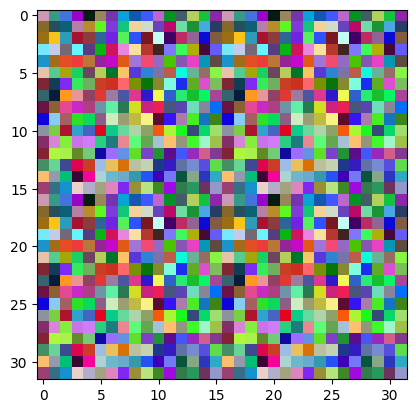

In [28]:

# generate dummy data and label
mse_final=[]
AS=0
sSim_final=[]
whole_duration=0
loss_value=0
count=0
ASR=0
for ii in range(0,len(dst_tensor),3):
    print("Image ID and Image count: ",ii, count+1)
    ######### honest partipant #########
    img_index = ii #use img_index
    dst_pil = tt(dst_tensor[img_index][0].cpu())   #use img_index

    gt_data = tp(dst_pil).to(device)
    gt_data = torch.unsqueeze(gt_data,0)

    gt_label = dst_tensor[img_index][1].long().to(device) #use img_index
    gt_label = gt_label.view(1, )
    gt_onehot_label = label_to_onehot(gt_label, num_classes=3)

    plt.imshow(dst_pil)





    batch =1  #
    for bat in range(batch-1):
        dst_pil = tt(dst_tensor[img_index+1+bat][0].cpu())   #use img_index
        tmp = torch.unsqueeze(tp(dst_pil).to(device),0)
        #print(tmp.shape)
        gt_data = torch.cat((gt_data,tmp),0)

        gt_label_tmp = dst_tensor[img_index+1+bat][1].long().to(device) #use img_index
        gt_label_tmp = gt_label_tmp.view(1, )
        gt_label = torch.cat((gt_label,gt_label_tmp),0)
        gt_onehot_label = torch.cat((gt_onehot_label,label_to_onehot(gt_label_tmp, num_classes=3)),0)

        if gt_label_tmp ==60:
            print (bat)

        plt.imshow(dst_pil)
        #plt.savefig("./original/index_%s_label_%s"%(bat+1,gt_label_tmp.item()))

        #plt.title("Ground truth image")
        #print("GT label is %d." % gt_label.item(), "\nOnehot label is %d." % torch.argmax(gt_onehot_label, dim=-1).item())


    gt_label = torch.reshape(gt_label,(-1,1))    
    print (gt_data.shape)
    print (gt_label.shape)
    print (gt_label)
    print (gt_onehot_label.shape)

    plt.imshow(tt(gt_data[0].cpu()),cmap='gray')
    #plt.imshow(invTrans(dst_tensor[66][0].cpu()).permute(1, 2, 0))
    # plt.axis('off')
    # plt.savefig("./attack_image/tifs")


    # compute original gradient 
    dy_dx = []
    original_dy_dx=[]
    original_pred = []
    for item in range(batch):
        gt_data_single = torch.unsqueeze(gt_data[item],0)
        out = net(gt_data_single)
        #y = criterion(out, gt_onehot_label[item])
        y = criterion(out, gt_label[item])
        dy_dx = torch.autograd.grad(y, net.parameters(),retain_graph=True)
        original_dy_dx_tmp = list((_.detach().clone() for _ in dy_dx))
        original_dy_dx.append(original_dy_dx_tmp)
        out_tmp = out.detach().clone()
        original_pred.append(out_tmp)


        #dy_dx.append(torch.autograd.grad(y, net.parameters()))



    # #FOR fully-connected model only
    #     dw = net.body[0].weight
    #     db = net.body[0].bias
    #     dy_dw = torch.autograd.grad(y, dw,retain_graph=True)
    #     dy_db = torch.autograd.grad(y, db,retain_graph=True)

    #     print (dy_dw)
    #     #print (dy_db.shape)

    #     leak=dy_dw/dy_db

    #     print (leak.shape)



    # share the gradients with other clients
    #original_dy_dx = list((_.detach().clone() for _ in dy_dx))

    import time

    from pytorch_msssim import ssim
    from skimage import measure


    #print (ssim(0.43*torch.unsqueeze(gt_data[0],dim=0),torch.unsqueeze(gt_data[0],dim=0),data_range=0).item())
    #print (torch.dist(0.6*torch.unsqueeze(gt_data[0],dim=0),torch.unsqueeze(gt_data[0],dim=0),2).item())


    for item in range(1):
        start = time.process_time()
        for rd in range(1):

            #torch.manual_seed(200*rd)
            #dummy_data = torch.unsqueeze(torch.randn(gt_data[item].size()),0).to(device).requires_grad_(True)

            #dummy_data = torch.unsqueeze(torch.zeros(gt_data[item].size()),0).to(device).requires_grad_(True)
            #dummy_data = torch.unsqueeze(torch.ones(gt_data[item].size()),0).to(device).requires_grad_(True)


            #background = torch.unsqueeze(torch.zeros(gt_data[item].size()),0)
            #background[0,0,::] = 1
            #dummy_data = background.to(device).requires_grad_(True)
            ##dummy_data = (torch.unsqueeze(torch.randn(gt_data[item].size()),0)+background).to(device).requires_grad_(True)

            #surrogate = torch.unsqueeze(gt_data[item+1],0)
            #aaa = torch.rand([3,16,16])
            #surrogate[0,:,8:24,8:24] =aaa
            #dummy_data = surrogate.to(device).requires_grad_(True)    

            #dummy_data = torch.unsqueeze(gt_data[item+1],0).to(device).requires_grad_(True)

            #k = np.random.randint(0,95)
            #dummy_data = torch.unsqueeze(gt_data[k],0).to(device).requires_grad_(True)


            pat_1 = torch.rand([3,16,16])
            pat_2 = torch.cat((pat_1,pat_1),dim=1)
            pat_4 = torch.cat((pat_2,pat_2),dim=2)
            dummy_data = torch.unsqueeze(pat_4,dim=0).to(device).requires_grad_(True)


            #aaa = torch.rand([3,8,8])
            #bbb = torch.cat((aaa,aaa),dim=1)
            #ccc = torch.cat((bbb,bbb),dim=1)
            #ddd = torch.cat((ccc,ccc),dim=2)
            #eee = torch.cat((ddd,ddd),dim=2)
            #dummy_data = torch.unsqueeze(eee,dim=0).to(device).requires_grad_(True)

            #aaa = torch.rand([3,4,4])
            #bbb = torch.cat((aaa,aaa),dim=1)
            #ccc = torch.cat((bbb,bbb),dim=1)
            #ddd = torch.cat((ccc,ccc),dim=1)
            #eee = torch.cat((ddd,ddd),dim=2)
            #fff = torch.cat((eee,eee),dim=2)
            #ggg = torch.cat((fff,fff),dim=2)
            #dummy_data = torch.unsqueeze(ggg,dim=0).to(device).requires_grad_(True)


            #dummy_data = plt.imread("./attack_image/replacement_69.png")
            #print (dummy_data.shape)
            #dummy_data = torch.FloatTensor(dummy_data).to(device)
            #dummy_data = dummy_data.transpose(2,3).transpose(1,2)

            dummy_unsqueeze=torch.unsqueeze(gt_onehot_label[item],dim=0)

            dummy_label = torch.randn(dummy_unsqueeze.size()).to(device).requires_grad_(True)
            label_pred=torch.argmin(torch.sum(original_dy_dx[item][-2], dim=-1), 
                                    dim=-1).detach().reshape((1,)).requires_grad_(False)
            #print (original_dy_dx[item][-1].shape)
            #print (original_dy_dx[item][-1].argmin())

            #print (torch.sum(original_dy_dx[item][-2], dim=-1).argmin())

            plt.imshow(tt(dummy_data[0]))
            #plt.title("Dummy data")
            #plt.savefig("./random_seed/index_%s_rand_seed_%s_label_%s"%(item,rd,torch.argmax(dummy_label, dim=-1).item()))

            #plt.clf()
            print("Dummy label is %d." % torch.argmax(dummy_label, dim=-1).item())
            print("stolen label is %d." % label_pred.item())


            #optimizer = torch.optim.LBFGS([dummy_data,dummy_label])
            optimizer = torch.optim.LBFGS([dummy_data,])
            #optimizer = torch.optim.AdamW([dummy_data,],lr=0.01)
            #optimizer = torch.optim.SGD([dummy_data,],lr=0.01)



            history = []

            percept_dis = np.zeros(300)
            recover_dis = np.zeros(300)
            for iters in range(300):


                percept_dis[iters]=ssim(dummy_data,torch.unsqueeze(gt_data[item],dim=0),data_range=0).item()
                #recover_dis[iters]=torch.dist(dummy_data,torch.unsqueeze(gt_data[item],dim=0),2).item()
                recover_dis[iters]= F.mse_loss(dummy_data,torch.unsqueeze(gt_data[item],dim=0),  reduction='mean').item()

                history.append(tt(dummy_data[0].cpu()))
                def closure():
                    optimizer.zero_grad()

                    pred = net(dummy_data) 

                    #dummy_onehot_label = F.softmax(dummy_label, dim=-1).long()

                    #dummy_loss = criterion(pred, dummy_onehot_label) # TODO: fix the gt_label to dummy_label in both code and slides.
                    ##print (pred)
                    ##print (label_pred)

                    dummy_loss = criterion(pred, label_pred)
                    dummy_dy_dx = torch.autograd.grad(dummy_loss, net.parameters(), create_graph=True)
                    ##dummy_dy_dp = torch.autograd.grad(dummy_loss, dummy_data, create_graph=True)
                    ##print (dummy_dy_dp[0].shape)  

                    grad_diff = 0
                    grad_count = 0
                    #count =0
                    #print(type(dummy_dy_dx))
                    dummy_dy_dx=list(dummy_dy_dx)
                    #print(type(original_dy_dx[item]))
                    for gx, gy in zip(dummy_dy_dx, original_dy_dx[item]): # TODO: fix the variablas here

                        #if iters==500 or iters== 1200:
                        #print (gx[0])
                        #    print ('hahaha')
                        #print (gy[0])
                        lasso = torch.norm(dummy_data,p=1)
                        ridge = torch.norm(dummy_data,p=2)
                        grad_diff += ((gx - gy) ** 2).sum() #+ 0.0*lasso +0.01*ridge 

                        #print (gx.shape)

                        grad_count += gx.nelement()


                        #if count == 9:
                        #    break
                        #count=count+1
                    # grad_diff = grad_diff / grad_count * 1000

                    #grad_diff += ((original_pred[item]-pred)**2).sum()




                    grad_diff.backward()
                    #print (count)

                    #print (dummy_dy_dx)
                    #print (original_dy_dx)


                    return grad_diff



                optimizer.step(closure)
                if iters % 5 == 0: 
                    current_loss = closure()
                    #if iters == 0: 
                    #print ("%.8f" % current_loss.item())
                    #print(iters, "%.8f" % current_loss.item())
                history.append(tt(dummy_data[0].cpu()))



            #plt.figure(figsize=(18, 12))
            #for i in range(60):
            #  plt.subplot(6, 10, i + 1)
            #  plt.imshow(history[i * 5])
            #  plt.title("iter=%d" % (i * 5))
            #  plt.axis('off')

            #plt.figure(figsize=(12, 1.5))
            #iter_idx = [0,20,40,60,80,100,120,140,160,180]
            #plt.figure(figsize=(6.5, 1.2))
            #iter_idx = [0,1000,2000,3000,4000,5000]
            iter_idx = [0,5,10,20,50,100]


            

            #np.savetxt('ssim_random2',percept_dis,fmt="%4f")
            #np.savetxt('mse_random2',recover_dis,fmt="%4f")

            #print("Dummy label is %d." % torch.argmax(dummy_label, dim=-1).item())
            #plt.savefig("./attack_image/index_%s_rand_%s_label_%s"%(item,rd, label_pred.item()))
            #plt.clf()

        duration = time.process_time()-start
    
        print ("Running time is %.4f." %(duration) )
        print ("Duration = ",duration/10.0)
        print("ssim_random2", percept_dis)
        print("mse_random2", recover_dis)
    count=count+1
    sSim_final.append(percept_dis[299])
    mse_final.append(recover_dis[299])
    whole_duration=whole_duration+(duration)
    if(percept_dis[299]>=.90):
        AS=AS+1
    



In [29]:
sSim_final

[0.021916713565587997,
 -0.011273449286818504,
 -0.003567604348063469,
 -0.01460574846714735,
 -0.0069412044249475,
 -0.017779432237148285,
 -0.012571710161864758,
 0.007849372923374176,
 0.018780384212732315,
 0.007728175260126591,
 -0.013150876387953758,
 -0.014759394340217113,
 0.020086470991373062,
 0.003317035734653473,
 0.024264542385935783,
 -0.005113748833537102,
 0.004709595814347267,
 -0.0030028242617845535,
 0.001770982751622796,
 0.0028280001133680344,
 0.00926540233194828,
 0.011175589635968208,
 -0.0002735319430939853,
 -0.015670565888285637,
 -0.011472076177597046,
 -0.0008570642094127834,
 -0.0070641255006194115,
 0.004262219183146954,
 -0.009806695394217968,
 0.005450612865388393,
 -0.02442849986255169,
 -0.0010433034040033817,
 -0.012352855876088142,
 -0.01640371046960354,
 0.0072563402354717255,
 0.012044454924762249,
 0.0038019162602722645,
 0.9999892115592957,
 0.9999870657920837,
 0.9999914169311523,
 0.9999861717224121,
 0.9999905824661255,
 0.9999884963035583,
 

In [30]:
mse_final

[0.15325501561164856,
 0.12572243809700012,
 0.15998852252960205,
 0.1642734706401825,
 0.1667577028274536,
 0.1559404581785202,
 0.15638265013694763,
 0.1612677425146103,
 0.17028920352458954,
 0.155655175447464,
 0.16688042879104614,
 0.17421339452266693,
 0.1468692123889923,
 0.1590028703212738,
 0.16147944331169128,
 0.1711120307445526,
 0.14008210599422455,
 0.1258533000946045,
 0.1608870029449463,
 0.1036490648984909,
 0.16265997290611267,
 0.12746118009090424,
 0.12739931046962738,
 0.1400468796491623,
 0.11488618701696396,
 0.13524532318115234,
 0.11751912534236908,
 0.13353359699249268,
 0.14142800867557526,
 0.12410177290439606,
 0.14305412769317627,
 0.13992087543010712,
 0.1270613968372345,
 0.10358834266662598,
 0.11284737288951874,
 0.11623243987560272,
 0.12737929821014404,
 2.5002447046063025e-07,
 3.506411303533241e-07,
 2.819409701260156e-07,
 3.296346449133125e-07,
 2.5406504278180364e-07,
 3.0411050033762876e-07,
 3.815224545178353e-07,
 2.7521838319444214e-07,
 4.2

In [31]:
print(count)
ASR=AS/count
print("Attack Success Rate: ", ASR)
print("Avg. SSIM: ", np.mean(sSim_final))
print("Avg. MSE: ", np.mean(mse_final))
print("Avg. Duration:", whole_duration/count)

84
Attack Success Rate:  0.5595238095238095
Avg. SSIM:  0.5590923907653805
Avg. MSE:  0.06278499975270621
Avg. Duration: 11.526041666666666


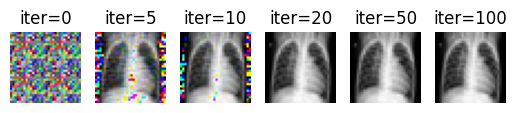

In [33]:
for i in range(6):
  plt.subplot(1, 6, i + 1)
  plt.imshow(history[iter_idx[i]])
  plt.title("iter=%d" % (iter_idx[i]))
  plt.axis('off')